### 1. Work through the book – build your own K Means cluster function and carry out the modelling done in the book.

### Scratch functions

In [1]:
from typing import List
Vector = List[float]

def scalar_multiply(c, v):
 """c is a number, v is a vector"""
 return [c * v_i for v_i in v]
def vector_mean(vectors):
 """compute the vector whose ith element is the mean of the
 ith elements of the input vectors"""
 n = len(vectors)
 return scalar_multiply(1/n, vector_sum(vectors))
def vector_subtract(v, w):
 """subtracts corresponding elements"""
 return [v_i - w_i for v_i, w_i in zip(v, w)]

def dot(v:Vector, w:Vector) -> float:
    assert len(v) == len(w), "Vectors must be same length"
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

def sum_of_squares(v:Vector) -> float:
    return dot(v,v)

def squared_distance(v, w):
 """(v_1 - w_1)  2 + ... + (v_n - w_n)  2"""
 return sum_of_squares(vector_subtract(v, w))

def vector_sum(vectors: List[Vector]) -> Vector:
    assert vectors, "no vectors provided!"
    
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"
    
    return [sum(vector[i] for vector in vectors)
           for i in range(num_elements)]

#### The Model

In [2]:
def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

In [3]:
assert num_differences([1,2,3], [2,1,3]) == 2
assert num_differences([1,2], [1,2]) == 0

##### Means of Clusters

In [4]:
def cluster_means(k: int, 
                 inputs: List[Vector],
                 assignments: List[int]) -> List[Vector]:
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)
    return [vector_mean(cluster) if cluster else random.choice(inputs)
           for cluster in clusters]

In [5]:
import tqdm
import random
import itertools

In [6]:
class KMeans:
    def __init__(self, k):
        self.k = k # number of clusters
        self.means = None # means of clusters
        
    def classify(self, input):
        return min(range(self.k),
        key=lambda i: squared_distance(input, self.means[i]))
    
    def train(self, inputs: List[Vector]) -> None:
        assignments = [random.randrange(self.k) for _ in inputs]
        
        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed} / {len(inputs)}")
#     # choose k random points as the initial means
#         self.means = random.sample(inputs, self.k)
#         assignments = None
#         while True:
#         # Find new assignments
#             new_assignments = map(self.classify, inputs)
#             # If no assignments have changed, we're done.
#             if assignments == new_assignments:
#                 return
#             # Otherwise keep the new assignments,
#             assignments = new_assignments
#             # And compute new means based on the new assignments
#             for i in range(self.k):
#             # find all the points assigned to cluster i
#                 i_points = [p for p, a in zip(inputs, assignments) if a == i]
#             # make sure i_points is not empty so don't divide by 0
#             if i_points:
#                 self.means[i] = vector_mean(i_points)

#### Using the class

In [7]:
import random

In [8]:
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

In [9]:
clusterer = KMeans(3)

In [10]:
clusterer.train(inputs)

changed: 1 / 20: : 2it [00:00, 789.37it/s]


In [11]:
print(clusterer.means)

[[-15.888888888888888, -10.333333333333332], [-43.800000000000004, 5.4], [18.333333333333332, 19.833333333333332]]


In [12]:
means = sorted(clusterer.means)

In [13]:
assert len(means) == 3

In [14]:
assert squared_distance(means[0], [-44, 5]) < 1

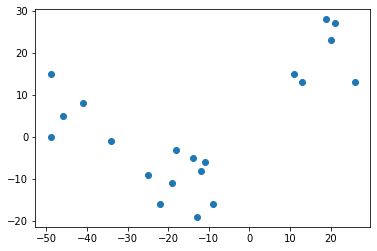

In [15]:
import numpy as np
import matplotlib.pyplot as plt

inputs_np = np.array(inputs)
plt.scatter(inputs_np[:,0], inputs_np[:,1])

#### Choosing k

0it [00:00, ?it/s]
changed: 3 / 20: : 6it [00:00, 680.18it/s]
changed: 1 / 20: : 2it [00:00, 707.48it/s]
changed: 1 / 20: : 3it [00:00, 450.98it/s]
changed: 1 / 20: : 3it [00:00, 641.82it/s]
changed: 1 / 20: : 3it [00:00, 486.07it/s]
changed: 1 / 20: : 3it [00:00, 475.37it/s]
changed: 2 / 20: : 3it [00:00, 417.48it/s]
changed: 2 / 20: : 2it [00:00, 343.44it/s]
changed: 1 / 20: : 3it [00:00, 327.19it/s]
changed: 1 / 20: : 3it [00:00, 401.28it/s]
changed: 1 / 20: : 4it [00:00, 337.03it/s]
changed: 1 / 20: : 4it [00:00, 393.71it/s]
changed: 2 / 20: : 3it [00:00, 242.03it/s]
changed: 4 / 20: : 2it [00:00, 260.41it/s]
changed: 2 / 20: : 4it [00:00, 192.80it/s]
changed: 1 / 20: : 4it [00:00, 214.38it/s]
changed: 1 / 20: : 5it [00:00, 329.91it/s]
changed: 1 / 20: : 5it [00:00, 289.07it/s]
changed: 5 / 20: : 2it [00:00, 185.25it/s]


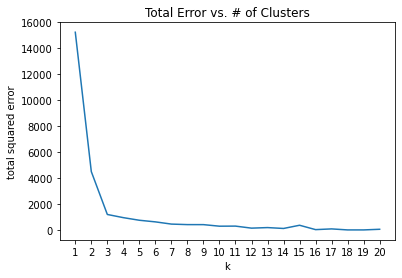

In [16]:
def squared_clustering_errors(inputs, k):
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = map(clusterer.classify, inputs)
    return sum(squared_distance(input, means[cluster])
               for input, cluster in zip(inputs, assignments))

# now plot from 1 up to len(inputs) clusters
ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]
plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

##### Den bedste k er 3

#### Image and colors

In [25]:
path_to_png_file = r"cat3.jpg" # wherever your image is
import matplotlib.image as mpimg
img = mpimg.imread(path_to_png_file)

In [26]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

In [27]:
pixels = [pixel for row in img for pixel in row]

In [28]:
clusterer = KMeans(5)
clusterer.train(pixels) # this might take a while

changed: 8 / 171840: : 40it [11:43, 17.58s/it]    


In [22]:
def recolor(pixel):
    cluster = clusterer.classify(pixel) # index of the closest cluster
    return clusterer.means[cluster] # mean of the closest cluster

new_img = [[recolor(pixel) for pixel in row] # recolor this row of pixels
           for row in img]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


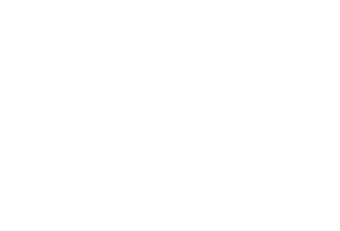

In [24]:
plt.imshow(new_img)
plt.axis('off')
plt.show()

### 2. Write a brief description of the use cases for K Means and DBSCAN algorithms. Hints on good use cases are in the notes – do further research as needed (e.g on DBSCAN used in recommendation engines

#### K Means
K Means is used to cluster data so we easily can see what data has something in commen. It can be used in unsupervised learning. K Means can for instance be used to find what areas there are most crime, by having a dataset with crime stats including location. 
The pros of K Means is that it is easy to understand and implement. It can be used on large datasets. The cons are that the method can be slow when the number of dimensions increases, and sometimes we get the wrong number of clusters if there for instance are to many outliers. 

#### DBSCAN (Density Based Spartial Clustering of Applications with Noise)
DBSCAN is used to cluster odd shapes of data. It clusters them by density instead of how for the data point are from each other. 
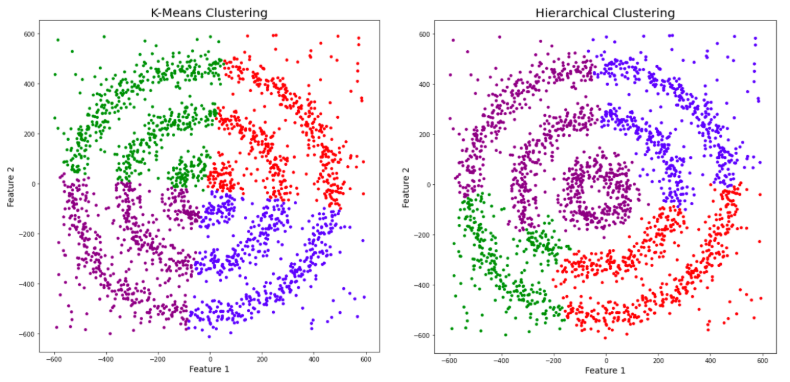
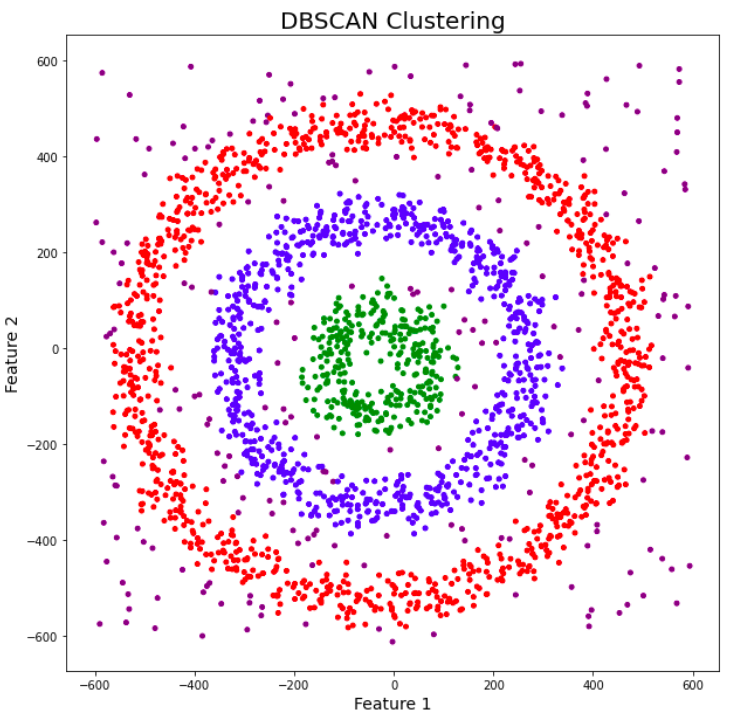
DBSCAN can be used to cluster data about natural disasters such as earthquakes and tsunamies. 

### 3. Thinking about these two algorithms provide a formal definition of clustering

Clustering is grouping data that has something in commen.

### 4. Describe with examples of plotting two ways of selecting the value of K for K-means clustering

#### The Elbow Method
The elbow method works by taking a range of k values and finds the sum of squered errors for that k. This is plottet and when the curve bends we can see the best k:
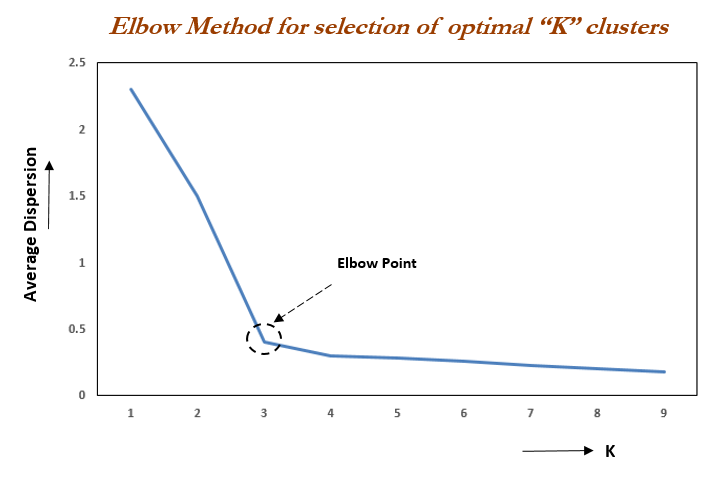

#### The Silhouette Method 
The silhouette method works by calculation the silhouette value, and if the value is +1 then we have a perfekt number of clusters, if it is -1 then we have too many or too few. So the closere we get to +1 the better. When we plot it like the picture below, we can see there are 2 outliers and 3 clusters, therfor k=3.
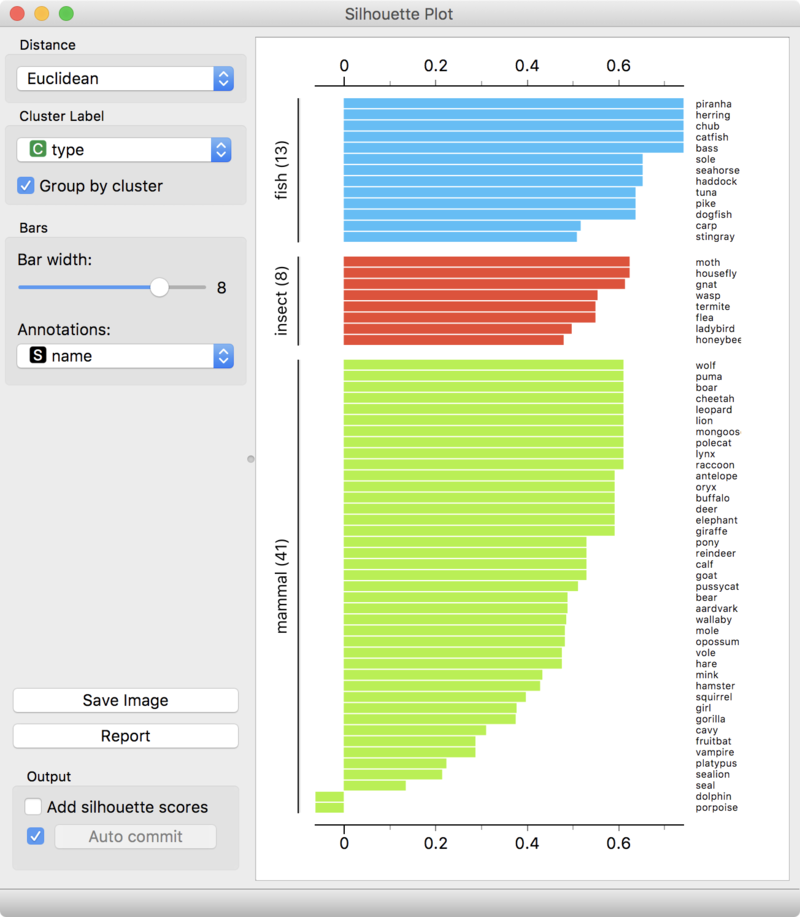

### 5. Which algorithm is good for large datasets and which one is good for regions of high density

The one there is good for large datasets is K Means, and DBSCAN is good for regions.

### 6. What does ‘high density mean’ in DBSCAN

That means that the dataset is homogeneous, and therfor there aint so many (or zero) outliers. 

### 7. Describe with an example how the initialisation of K Means can affect the inertia value and the quality of the model. 

As we understand it K Means is just a function that calculates the relationship between the k's and the sums of squared errors. The sum of squared errors is inertia, and yes, if K Means calculates something crazy then inertia will be affected. 
If the dataset is small then the quality will be more bad, and if the dataset is large then we will have a higher quality. 

If the number of clusters increases then we expect the inertia to decrease, but that is not always guaranteed. This would make the quality of the model bad. This can be seen in this picture:
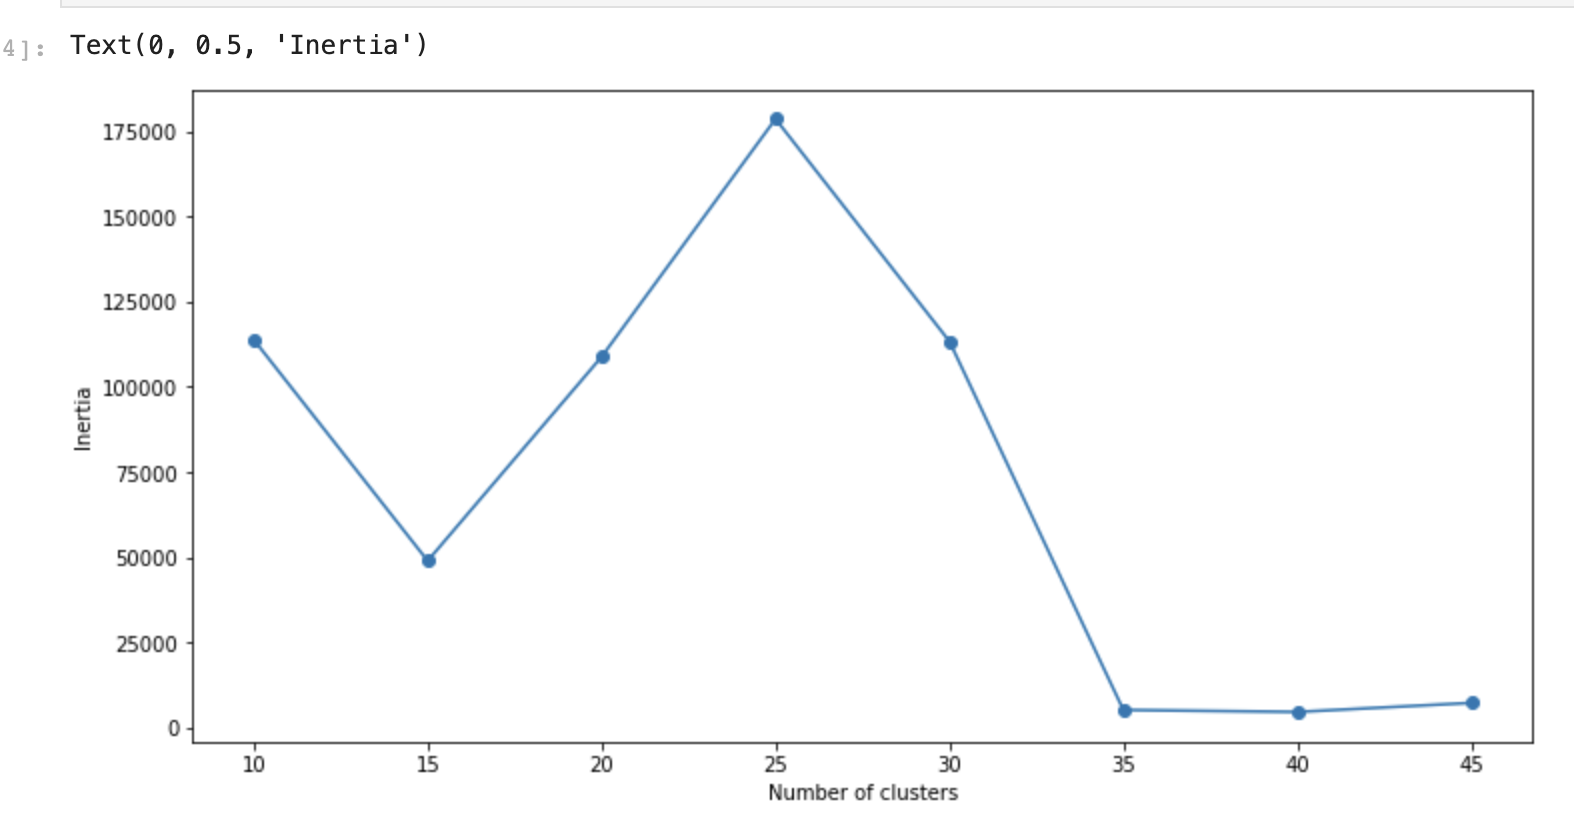

### 8. Prepare a model using K Means for the Olivetti data set from scikit learn – this exercise comes from Gueron p275

In [31]:
from sklearn.datasets import fetch_olivetti_faces

In [33]:
olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\miade\scikit_learn_data


In [34]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [35]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

##### Split into train, valid and test data

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [37]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


##### To speed things up, we'll reduce the data's dimensionality using PCA:

In [38]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [39]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


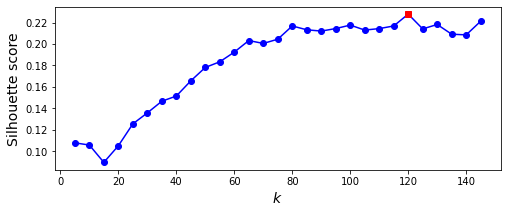

In [40]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [44]:
best_k

120

##### It looks like the best number of clusters is quite high, at 120. You might have expected it to be 40, since there are 40 different people on the pictures. However, the same person may look quite different on different pictures (e.g., with or without glasses, or simply shifted left or right).

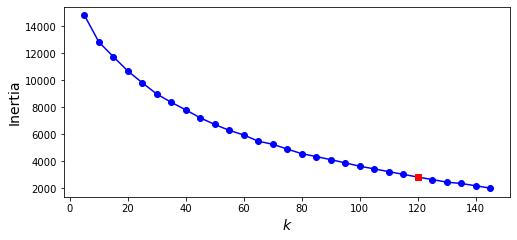

In [43]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [47]:
best_model = kmeans_per_k[best_index]
print(best_model)

KMeans(n_clusters=120, random_state=42)


Cluster 0


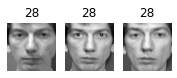

Cluster 1


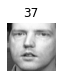

Cluster 2


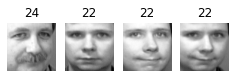

Cluster 3


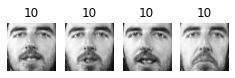

Cluster 4


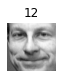

Cluster 5


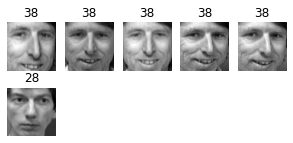

Cluster 6


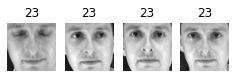

Cluster 7


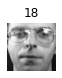

Cluster 8


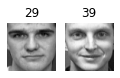

Cluster 9


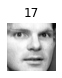

Cluster 10


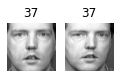

Cluster 11


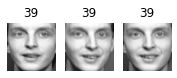

Cluster 12


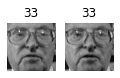

Cluster 13


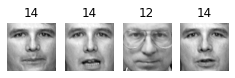

Cluster 14


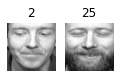

Cluster 15


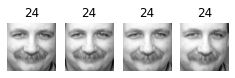

Cluster 16


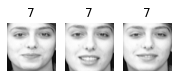

Cluster 17


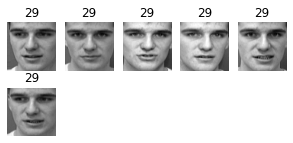

Cluster 18


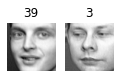

Cluster 19


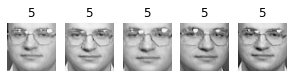

Cluster 20


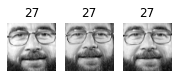

Cluster 21


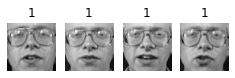

Cluster 22


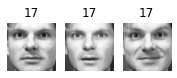

Cluster 23


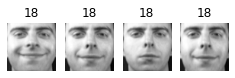

Cluster 24


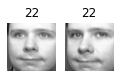

Cluster 25


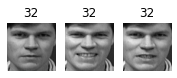

Cluster 26


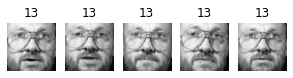

Cluster 27


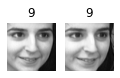

Cluster 28


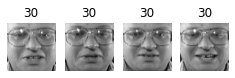

Cluster 29


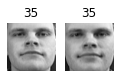

Cluster 30


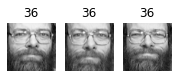

Cluster 31


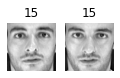

Cluster 32


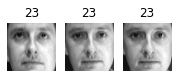

Cluster 33


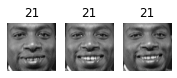

Cluster 34


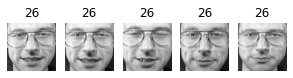

Cluster 35


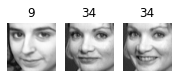

Cluster 36


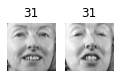

Cluster 37


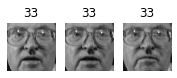

Cluster 38


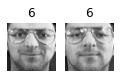

Cluster 39


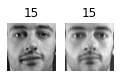

Cluster 40


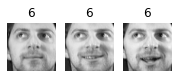

Cluster 41


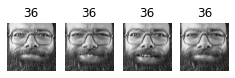

Cluster 42


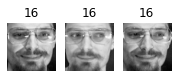

Cluster 43


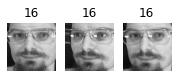

Cluster 44


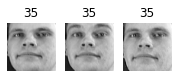

Cluster 45


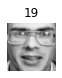

Cluster 46


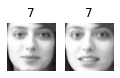

Cluster 47


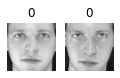

Cluster 48


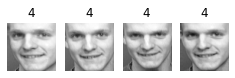

Cluster 49


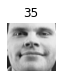

Cluster 50


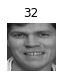

Cluster 51


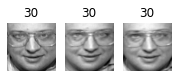

Cluster 52


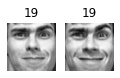

Cluster 53


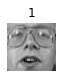

Cluster 54


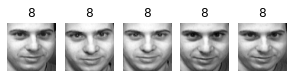

Cluster 55


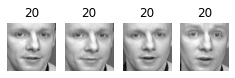

Cluster 56


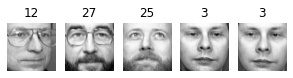

Cluster 57


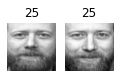

Cluster 58


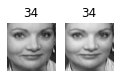

Cluster 59


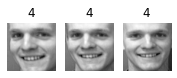

Cluster 60


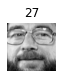

Cluster 61


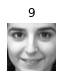

Cluster 62


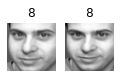

Cluster 63


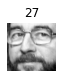

Cluster 64


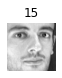

Cluster 65


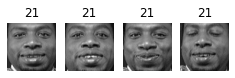

Cluster 66


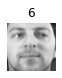

Cluster 67


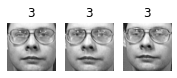

Cluster 68


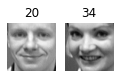

Cluster 69


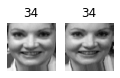

Cluster 70


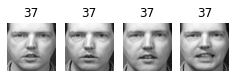

Cluster 71


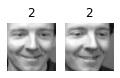

Cluster 72


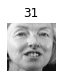

Cluster 73


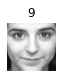

Cluster 74


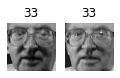

Cluster 75


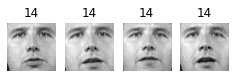

Cluster 76


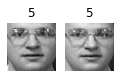

Cluster 77


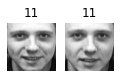

Cluster 78


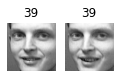

Cluster 79


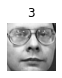

Cluster 80


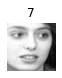

Cluster 81


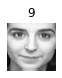

Cluster 82


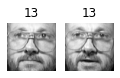

Cluster 83


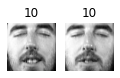

Cluster 84


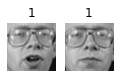

Cluster 85


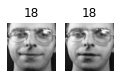

Cluster 86


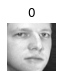

Cluster 87


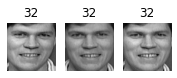

Cluster 88


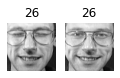

Cluster 89


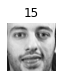

Cluster 90


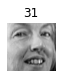

Cluster 91


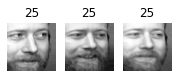

Cluster 92


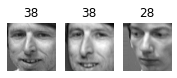

Cluster 93


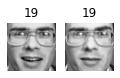

Cluster 94


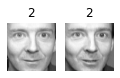

Cluster 95


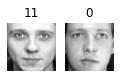

Cluster 96


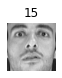

Cluster 97


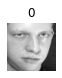

Cluster 98


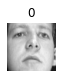

Cluster 99


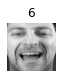

Cluster 100


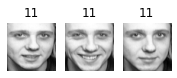

Cluster 101


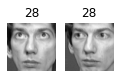

Cluster 102


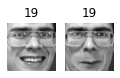

Cluster 103


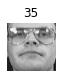

Cluster 104


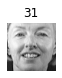

Cluster 105


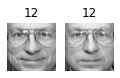

Cluster 106


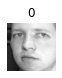

Cluster 107


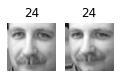

Cluster 108


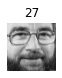

Cluster 109


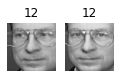

Cluster 110


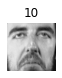

Cluster 111


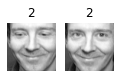

Cluster 112


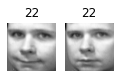

Cluster 113


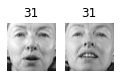

Cluster 114


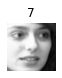

Cluster 115


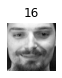

Cluster 116


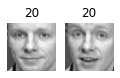

Cluster 117


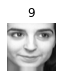

Cluster 118


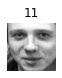

Cluster 119


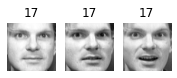

In [46]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)